Create a new Python application

In [4]:
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import os

Create variables for your resource's Azure endpoint and keys.

In [7]:
prediction_endpoint = "https://smu2111290findbungee-prediction.cognitiveservices.azure.com"
prediction_key = "AYRqJE0vDxfAItYKHTDjZ3zDra9rxLpJK2SELPjLnkiRPAhFDcC5JQQJ99BDACqBBLyXJ3w3AAAIACOGb3Qd"
project_id = "3648a255-523e-4952-bc72-841e189ff518"
model_name = "Iteration1"

Authenticate the client

In [8]:
credentials = ApiKeyCredentials(in_headers={"Prediction-key": prediction_key})
predictor = CustomVisionPredictionClient(endpoint=prediction_endpoint, credentials=credentials)
# Test

Load image and get height, width and channels

In [13]:
image_file = "./data/test-1.png"
print('Detecting objects in ', image_file)
image=Image.open(image_file)
h, w, ch = np.array(image).shape
print(h)
print(w)
print(ch)

Detecting objects in  ./data/test-1.png
791
1410
3


Detect objects in the test image

In [14]:
with open(image_file, mode="rb") as image_data:
    results = predictor.detect_image(project_id, model_name, image_data)

# Display the results.    
for prediction in results. predictions:
    print("\t" + prediction.tag_name + ": {0:.2f}% bbox.left = {1:.2f}, bbox.top = {2:.2f}, bbox.width = {3:.2f}, bbox.height = {4:.2f}".format(prediction.probability * 100, prediction.bounding_box.left, prediction.bounding_box.top, prediction.bounding_box.width, prediction.bounding_box.height))

	Bungee: 98.96% bbox.left = 0.11, bbox.top = 0.35, bbox.width = 0.59, bbox.height = 0.53
	Bungee: 65.69% bbox.left = 0.57, bbox.top = 0.41, bbox.width = 0.43, bbox.height = 0.59
	Bungee: 36.36% bbox.left = 0.01, bbox.top = 0.01, bbox.width = 0.12, bbox.height = 0.65
	Bungee: 7.72% bbox.left = 0.12, bbox.top = 0.38, bbox.width = 0.88, bbox.height = 0.62
	Bungee: 5.47% bbox.left = 0.00, bbox.top = 0.52, bbox.width = 0.02, bbox.height = 0.25
	Bungee: 3.87% bbox.left = 0.66, bbox.top = 0.37, bbox.width = 0.33, bbox.height = 0.63
	Bungee: 2.73% bbox.left = 0.00, bbox.top = 0.00, bbox.width = 0.16, bbox.height = 1.00
	Bungee: 2.47% bbox.left = 0.67, bbox.top = 0.62, bbox.width = 0.33, bbox.height = 0.37
	Bungee: 2.38% bbox.left = 0.11, bbox.top = 0.22, bbox.width = 0.56, bbox.height = 0.78


Create a figure for the results
Display the image with boxes around each detected object

Results saved in output.jpg


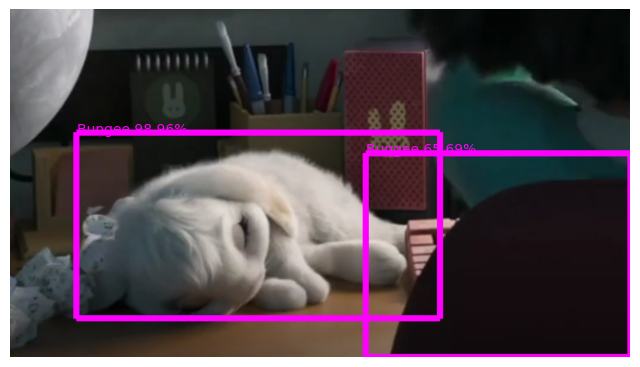

In [15]:
fig = plt.figure(figsize=(8,8))
plt.axis('off')

draw = ImageDraw.Draw(image)
lineWidth = int(w/100)
color = 'magenta'

for prediction in results. predictions:

    if (prediction.probability*100) > 50:
        left = prediction.bounding_box.left * w
        top = prediction.bounding_box.top * h
        width = prediction.bounding_box.width * w
        height = prediction.bounding_box.height * h

        points = ((left,top), (left+width,top), (left+width,top+height), (left,top+height),(left,top))
        draw.line(points, fill=color, width=lineWidth)
        plt.annotate(prediction.tag_name + ' {0:.2f}%'.format(prediction.probability * 100), (left, top), color=color)
        
plt.imshow(image)
outputfile = 'output.jpg'
fig. savefig(outputfile)
print('Results saved in', outputfile)